## Average Mutual Information
---

In order to conduct [Continuous RQA](rqaContinuous.ipynb) or [Categorical RQA](rqaCategorical.ipynb), we first need to determine how many dimensions best capture the dynamics in a measured behavioral time series. To do this, researchers use phase space reconstruction (PSR). Here, the time series is embedded within a phase space that is (re)constructed to be isomorphic, or at least similar, to the system’s real state space. To perform the reconstruction, two parameters are needed: the embedding dimension and the time lag.

#### Estimating the Time Lag

The first step of PSR is to determine the time delay or sample interval required to unfold the temporal structure of a system’s phase space trajectory. This is typically calculated using an average mutual information (AMI) analysis (although auto-correlation can also be used). AMI identifies the optimal time delay for reconstructing a system’s phase space by measuring the amount of shared information between a time series and a delayed version of itself across n time delays. A suitable delay is found when the mutual information first reaches a minimum. 

#### Let's Practice AMI

Before we begin, we need to import and load various packages and utilities. These will allow us to import the data, manipulate it, run AMI, and create visualizations to explore our results.

The code below will do all the setup for you. Simply click the "play" button on the left to run the code, and we'll be ready to start our analysis. 

In [1]:
import os
import pandas as pd
from utils.ami_utils import ami, cross_ami, plot_ami, plot_cross_ami

Now that all the utilities are loaded, it's time to apply AMI to some real data — in this case, positional data from an individual [swinging a pendulum](data/rqaContinuous/pendulums.txt). 

Click the "play" button below to perform the analysis and generate the visualisations.

Loading file: pendulums.txt


Processing AMI: 100%|██████████| 201/201 [00:00<00:00, 239.98it/s]


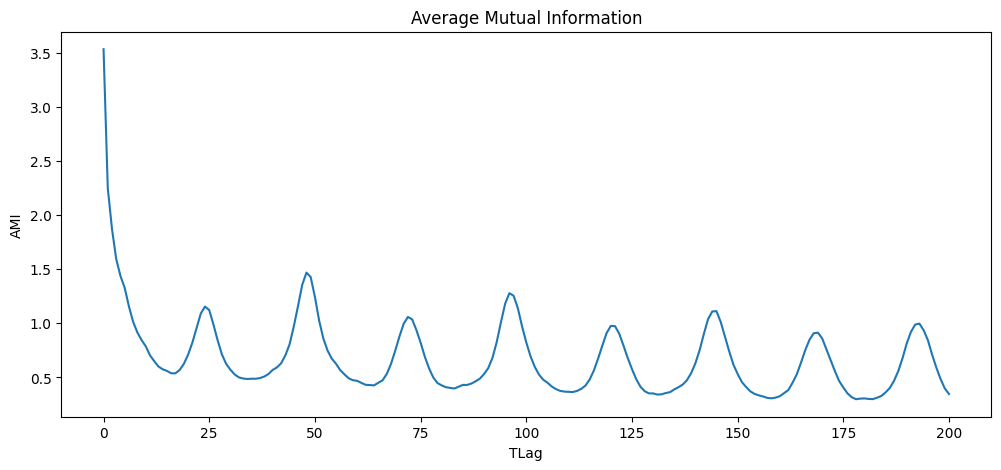

AMI and plotting completed successfully!


In [2]:
# First set the directory path for the data
data_directory = "data/crqaContinuous/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file name for the data
file_name = "pendulums.txt"
file_path = os.path.join(data_directory, file_name)

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path, header=None, sep='\t')

    # Select first column in data to analyse
    continuous_data = data.iloc[:, 0]

    # Compute AMI
    ami_values = ami(continuous_data, 0, 200)

    # Plot AMI
    plot_ami(ami_values)

    print('AMI and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')


#### Interpreting the Results

If your code ran successfully, you should see a graph with distinct peaks and valleys. As noted above, a suitable delay is found when the mutual information first reaches a minimum. Here, that appears to be around 15. 

#### Periodic vs. Other Data Types

Sometimes AMI does not give clear peaks and valleys. This can make it more difficult to select a delay. Let's look at a different time series: [acceleration data](data/rqaContinuous/walkerAfriend.txt) from a person walking. This data is also used in the [Continuous RQA](rqaContinuous.ipynb) section. As such, this code will allow you to see how we selected the delay for RQA.

Click the "play" button below to perform the analysis and generate the visualisations.

Loading file: walkersABfriend.txt


Processing AMI: 100%|██████████| 201/201 [00:02<00:00, 99.21it/s] 


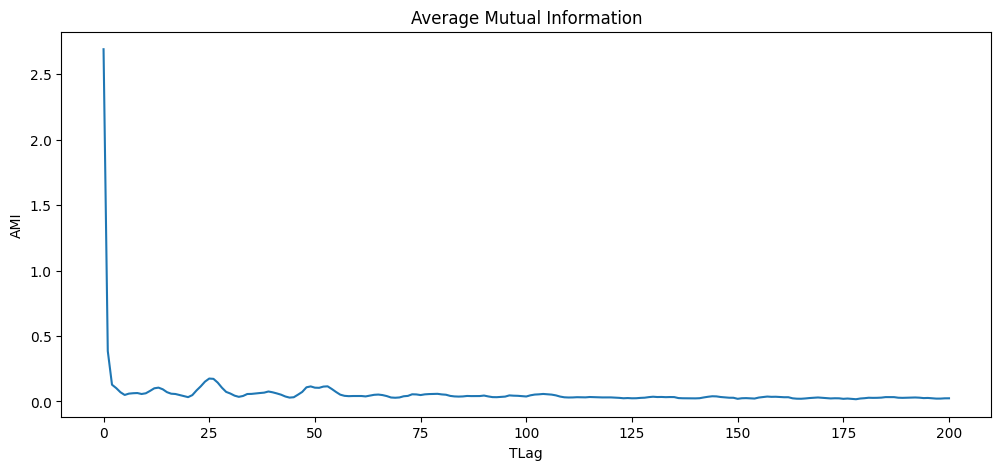

AMI and plotting completed successfully!


In [3]:
# First set the directory path for the data
data_directory = "data/crqaContinuous/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file name for the data
file_name = "walkersABfriend.txt"
file_path = os.path.join(data_directory, file_name)

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path, header=None, sep='\t')

    # Select first column in data to analyse
    continuous_data = data.iloc[:, 0]

    # Compute AMI
    ami_values = ami(continuous_data, 0, 200)

    # Plot AMI
    plot_ami(ami_values)

    print('AMI and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')


Here best practice suggests selecting the point at which the graph levels out. This looks to be around 5.

#### Cross AMI

It is also possible to conduct Cross Average Mutual Information (Cross AMI) to investigate the relationship between two different time series. Cross AMI measures the amount of shared information between two different signals at varying time lags. 

Let's run cross AMI using pendulum swinging data from two participants. Click the "play" button below to perform the analysis and generate the visualisations. 

Loading file: pendulums.txt


Processing Cross-AMI: 100%|██████████| 201/201 [00:00<00:00, 233.59it/s]


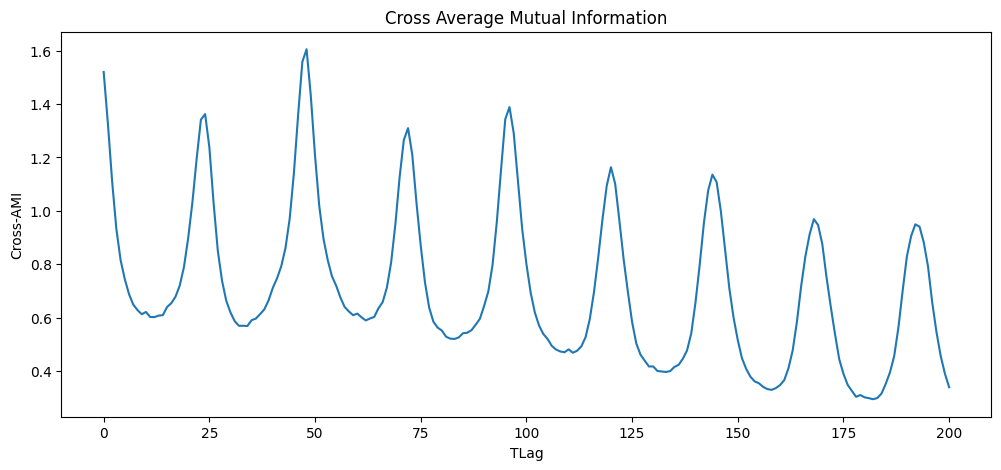

AMI and plotting completed successfully!


In [4]:
# First set the directory path for the data
data_directory = "data/crqaContinuous/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file name for the data
file_name = "pendulums.txt"
file_path = os.path.join(data_directory, file_name)

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path, header=None, sep='\t')

    # Select columns in data to analyse
    ts1 = data.iloc[:, 0]
    ts2 = data.iloc[:, 1]

    # Compute AMI
    cross_ami_values = cross_ami(ts1, ts2, 0, 200)

    # Plot AMI
    plot_cross_ami(cross_ami_values)

    print('AMI and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')


#### Going Further

Once you have selected an appropriate delay, you can then determine how many dimensions are needed to recover the system's phase space (i.e., the embedding dimension). This can be determined using [false nearest neighbors (FNN) analysis](ami_fnn.ipynb). Head to the FNN section of this tutorial to learn how to select the appropriate embedding dimension. 